In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(nn.Softmax(dim=1)(logits))
print(f"Predicted class: {y_pred}")

tensor([[0.1040, 0.0977, 0.0924, 0.1015, 0.0966, 0.0969, 0.1042, 0.0983, 0.1069,
         0.1016]], device='mps:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([8], device='mps:0')


In [6]:
logits

tensor([[-0.0468, -0.0713, -0.0432, -0.0651, -0.0742,  0.0341,  0.0218,  0.0001,
          0.0171,  0.0493]], device='mps:0', grad_fn=<LinearBackward0>)

In [7]:
nn.Softmax(dim=0)(logits)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], device='mps:0',
       grad_fn=<SoftmaxBackward0>)

In [8]:
nn.Softmax(dim=1)(logits)

tensor([[0.0970, 0.0947, 0.0974, 0.0953, 0.0944, 0.1052, 0.1039, 0.1017, 0.1034,
         0.1068]], device='mps:0', grad_fn=<SoftmaxBackward0>)

In [14]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [15]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [16]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [17]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0097, -0.3122, -0.1998,  0.0798, -0.1405,  0.0627, -0.3217,  0.0122,
          0.0121,  0.2511, -0.4854,  0.1236,  0.1537, -0.0167, -0.3295, -0.1019,
         -0.4330,  0.3521,  0.1215,  0.4935],
        [ 0.2074, -0.0308, -0.2765, -0.2146, -0.2947,  0.2755, -0.1035, -0.0653,
         -0.1725,  0.0488, -0.5399,  0.5594,  0.1775, -0.0570, -0.3237,  0.1968,
         -0.0536,  0.3665,  0.2968,  0.6428],
        [-0.0387, -0.1671, -0.3340,  0.0946,  0.1714, -0.2719, -0.3171, -0.2269,
         -0.2351,  0.2204, -0.2933,  0.5333, -0.3258,  0.0911, -0.1425, -0.2030,
         -0.2326,  0.1458,  0.1921,  0.4695]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0097, 0.0000, 0.0000, 0.0798, 0.0000, 0.0627, 0.0000, 0.0122, 0.0121,
         0.2511, 0.0000, 0.1236, 0.1537, 0.0000, 0.0000, 0.0000, 0.0000, 0.3521,
         0.1215, 0.4935],
        [0.2074, 0.0000, 0.0000, 0.0000, 0.0000, 0.2755, 0.0000, 0.0000, 0.0000,
         0.0488, 0.0000, 0.5594, 0.1775, 0.0000, 0.00

In [23]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
logits

tensor([[ 0.1202, -0.2088,  0.2993,  0.2692,  0.0568,  0.1811, -0.0832, -0.0377,
         -0.0842, -0.2152],
        [-0.0429, -0.1531,  0.1774,  0.2470,  0.0447,  0.1452,  0.0501,  0.2141,
         -0.1690, -0.1751],
        [-0.0289, -0.2314,  0.2449,  0.1757, -0.0685,  0.1899,  0.1139,  0.0281,
         -0.2384, -0.0389]], grad_fn=<AddmmBackward0>)

In [26]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.1078, 0.0776, 0.1289, 0.1251, 0.1012, 0.1145, 0.0879, 0.0920, 0.0879,
         0.0771],
        [0.0915, 0.0820, 0.1141, 0.1223, 0.0999, 0.1105, 0.1005, 0.1184, 0.0807,
         0.0802],
        [0.0945, 0.0772, 0.1243, 0.1160, 0.0909, 0.1177, 0.1090, 0.1001, 0.0767,
         0.0936]], grad_fn=<SoftmaxBackward0>)

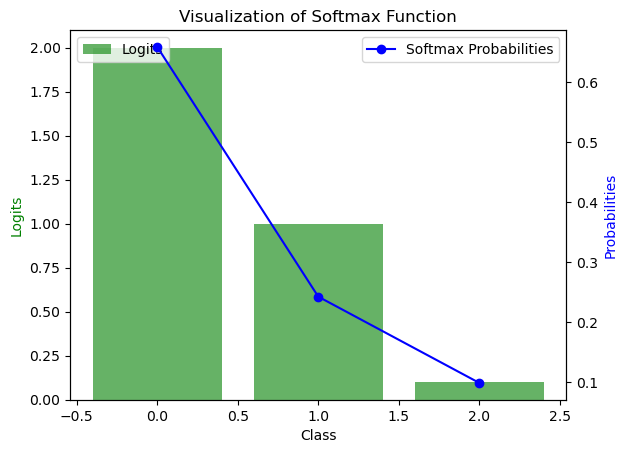

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Generate some sample logits
logits = np.array([2.0, 1.0, 0.1])

# Apply Softmax to convert logits to probabilities
softmax = nn.Softmax(dim=0)
logits_tensor = torch.tensor(logits)
probabilities = softmax(logits_tensor).numpy()

# Plot the raw logits and their corresponding probabilities
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(range(len(logits)), logits, color='g', alpha=0.6, label='Logits')
ax2.plot(range(len(logits)), probabilities, 'b-', marker='o', label='Softmax Probabilities')

ax1.set_xlabel('Class')
ax1.set_ylabel('Logits', color='g')
ax2.set_ylabel('Probabilities', color='b')

# Adding title and legends
plt.title('Visualization of Softmax Function')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


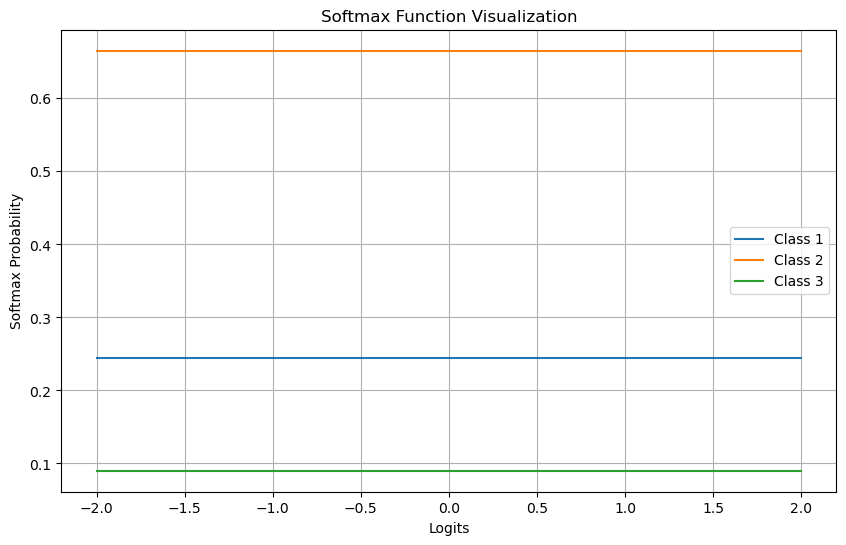

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Define the softmax function
def softmax(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    softmax = nn.Softmax(dim=0)
    return softmax(x_tensor).numpy()

# Generate a range of logits
logits_range = np.linspace(-2, 2, 100)  # 100 values from -2 to 2

# Create a matrix of logits to visualize multiple softmax transformations
logits_matrix = np.vstack([logits_range, logits_range + 1, logits_range - 1]).T

# Apply softmax to each set of logits
softmax_probabilities = np.apply_along_axis(softmax, 1, logits_matrix)

# Plot the softmax probabilities
plt.figure(figsize=(10, 6))
for i in range(softmax_probabilities.shape[1]):
    plt.plot(logits_range, softmax_probabilities[:, i], label=f'Class {i+1}')

plt.xlabel('Logits')
plt.ylabel('Softmax Probability')
plt.title('Softmax Function Visualization')
plt.legend()
plt.grid(True)
plt.show()


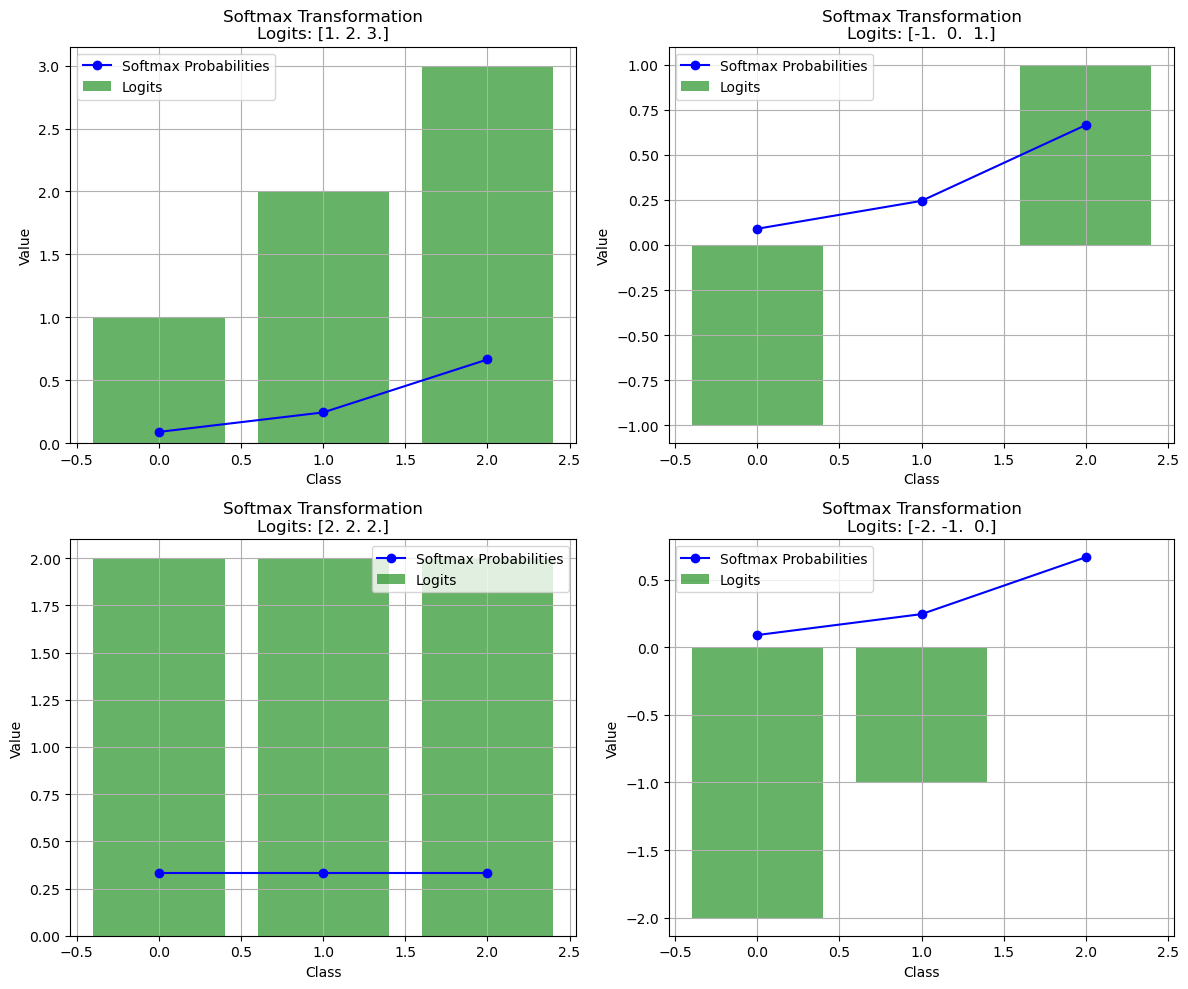

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Define the softmax function
def softmax(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    softmax = nn.Softmax(dim=0)
    return softmax(x_tensor).numpy()

# Generate sets of logits
logits_sets = [
    np.array([1.0, 2.0, 3.0]),
    np.array([-1.0, 0.0, 1.0]),
    np.array([2.0, 2.0, 2.0]),
    np.array([-2.0, -1.0, 0.0])
]

# Apply softmax to each set of logits
softmax_probabilities = [softmax(logits) for logits in logits_sets]

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (logits, probabilities) in enumerate(zip(logits_sets, softmax_probabilities)):
    ax = axes[i//2, i%2]
    ax.bar(range(len(logits)), logits, alpha=0.6, color='g', label='Logits')
    ax.plot(range(len(probabilities)), probabilities, 'b-', marker='o', label='Softmax Probabilities')
    ax.set_xlabel('Class')
    ax.set_ylabel('Value')
    ax.set_title(f'Softmax Transformation\nLogits: {logits}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


In [30]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0270,  0.0107,  0.0102,  ...,  0.0090,  0.0060, -0.0088],
        [-0.0076,  0.0203,  0.0239,  ..., -0.0144, -0.0344, -0.0034]],
       device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0140,  0.0042], device='mps:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0013, -0.0436, -0.0090,  ..., -0.0294, -0.0113, -0.0438],
        [ 0.0040, -0.0373, -0.0038,  ..., -0.0070, -0.0065, -0.0018]],
       device='mps:0', grad_fn=<Slice